In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import tarfile
import os
from keras import models
from keras.layers import Flatten, Dense

In [39]:
# Manually download CIFAR-10 dataset and extract it to a local directory
dataset_url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
local_tar_file = "/Users/rithwikkamalesh/Desktop/Dataset image classification/cifar-10-python.tar.gz"
local_extract_dir = "cifar-10-batches-py"

# Download the dataset
os.system("wget " + dataset_url)

# Extract the dataset
with tarfile.open(local_tar_file, "r:gz") as tar:
    tar.extractall()

# Load CIFAR-10 dataset from the local directory
import numpy as np

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def load_cifar10_data():
    train_batches = [unpickle(os.path.join(local_extract_dir, f"data_batch_{i}")) for i in range(1, 6)]
    test_batch = unpickle(os.path.join(local_extract_dir, "test_batch"))
    
    x_train = np.concatenate([batch[b'data'] for batch in train_batches], axis=0)
    y_train = np.concatenate([batch[b'labels'] for batch in train_batches], axis=0)
    x_test = test_batch[b'data']
    y_test = np.array(test_batch[b'labels'])
    
    x_train = x_train.reshape((len(x_train), 3, 32, 32)).transpose(0, 2, 3, 1)
    x_test = x_test.reshape((len(x_test), 3, 32, 32)).transpose(0, 2, 3, 1)
    
    return (x_train, y_train), (x_test, y_test)

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = load_cifar10_data()


sh: wget: command not found


In [89]:
def plot_sample(x_test, y_test, index):
    plt.figure(figsize=(2,2))
    plt.imshow(x_test[index])
    class_index = np.argmax(y_test[index])
    class_name = class_names[class_index]
    plt.title(f"Label: {class_name}")
    plt.axis('off')
    plt.show()

In [40]:
x_test.shape

(10000, 32, 32, 3)

In [41]:
x_train.shape

(50000, 32, 32, 3)

In [42]:
y_train.shape

(50000,)

In [43]:
y_train[:5]

array([6, 9, 9, 4, 1])

In [44]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1])

In [45]:
 y_test = y_test.reshape(-1,)

In [46]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

In [47]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

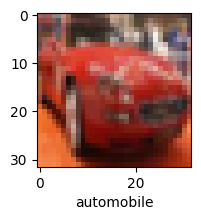

In [48]:
plot_sample(x_train, y_train, 5)

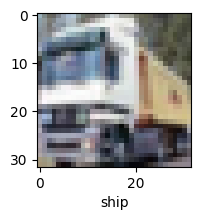

In [49]:
plot_sample(x_train, y_test, 1)

In [50]:
x_train = x_train/255.0
y_train = y_train/255.0

In [58]:
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN model
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(x_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.3230 - loss: 1.9292 - val_accuracy: 0.5201 - val_loss: 1.3312
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5325 - loss: 1.3036 - val_accuracy: 0.6040 - val_loss: 1.1084
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.6269 - loss: 1.0664 - val_accuracy: 0.5978 - val_loss: 1.1699
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6768 - loss: 0.9309 - val_accuracy: 0.6892 - val_loss: 0.8693
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7015 - loss: 0.8569 - val_accuracy: 0.6845 - val_loss: 0.9092
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7222 - loss: 0.7894 - val_accuracy: 0.6878 - val_loss: 0.8920
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7400 - loss: 0.7360 - val_accuracy: 0.6782 - val_loss: 0.9501
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7656 -

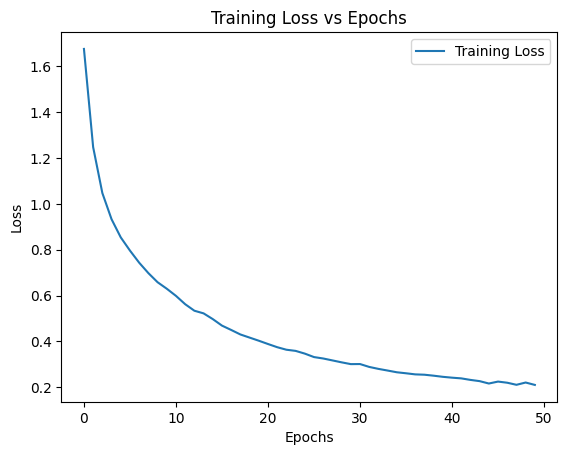

In [59]:
import matplotlib.pyplot as plt

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.legend()
plt.show()


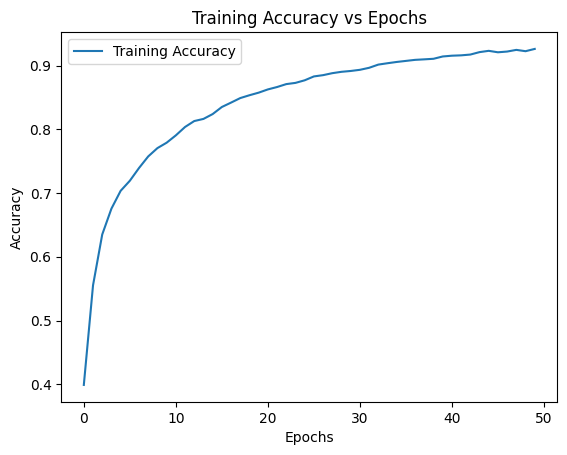

In [60]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Epochs')
plt.legend()
plt.show()


In [61]:
from keras.utils import to_categorical
from sklearn.metrics import classification_report

# Assuming your model is already trained and you have x_test and y_test data ready

# Make predictions on test data
predictions = cnn.predict(x_test)

# Convert predictions to class labels
predicted_labels = [np.argmax(pred) for pred in predictions]

# Convert true labels to class labels
true_labels = [np.argmax(label) for label in y_test]

# Generate classification report
report = classification_report(true_labels, predicted_labels)

# Print the classification report
print(report)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.72      0.84      0.78      1000
           1       0.85      0.90      0.87      1000
           2       0.69      0.58      0.63      1000
           3       0.53      0.58      0.55      1000
           4       0.75      0.67      0.71      1000
           5       0.69      0.65      0.67      1000
           6       0.85      0.76      0.80      1000
           7       0.76      0.81      0.79      1000
           8       0.82      0.86      0.84      1000
           9       0.84      0.84      0.84      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [62]:
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


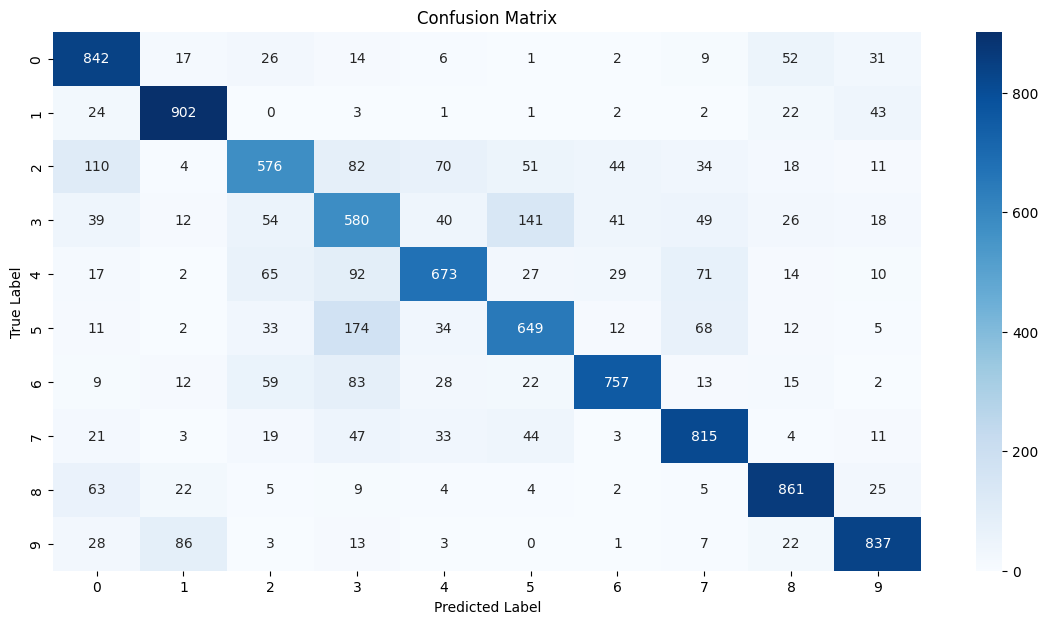

In [65]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have made predictions using your model on the test data x_test
y_pred = cnn.predict(x_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(14, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


In [68]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
    
    layers. Flatten(),
    layers. Dense(64, activation='relu'), 
    layers.Dense(10, activation='softmax')
])
                                                   

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])



In [76]:
from keras.utils import to_categorical

# Convert class labels to integer format
y_train_int = np.argmax(y_train, axis=1)

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
history = cnn.fit(x_train, y_train_int, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8672 - loss: 0.3777
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8799 - loss: 0.3436
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8807 - loss: 0.3336
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8873 - loss: 0.3202
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8897 - loss: 0.3109
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8987 - loss: 0.2864
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8979 - loss: 0.2801
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9057 - loss: 0.2662
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9084 - loss: 0.2549
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9100 - loss: 0.2510


In [78]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.2898950e-05, 8.9193884e-14, 2.9487779e-07, 9.9773490e-01,
        3.8229926e-05, 2.1865040e-03, 1.4122914e-05, 2.6079515e-11,
        3.0699089e-06, 6.0962702e-10],
       [4.5306834e-07, 1.6171438e-01, 3.6521703e-14, 1.5301287e-13,
        1.9969033e-15, 5.0552783e-18, 2.1971737e-21, 9.0492128e-18,
        8.3810151e-01, 1.8377903e-04],
       [4.0004089e-01, 2.9046774e-01, 9.5829237e-06, 6.7229387e-03,
        3.2516176e-04, 4.9416708e-06, 3.5840007e-09, 3.4765336e-03,
        2.7399704e-01, 2.4955247e-02],
       [9.4549203e-01, 1.1456525e-03, 2.4449489e-06, 6.7240835e-09,
        2.3330953e-08, 4.2697213e-12, 8.6730926e-13, 6.2173044e-12,
        5.3343125e-02, 1.6675369e-05],
       [4.4849742e-11, 5.6788094e-09, 6.2784617e-04, 2.7845323e-03,
        6.9554090e-01, 6.1749719e-04, 3.0040690e-01, 3.5804406e-12,
        2.2225457e-05, 1.1221546e-10]], dtype=float32)

In [79]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [83]:
y_test[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

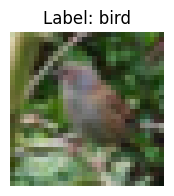

In [95]:
plot_sample(x_test, y_test, 65)

In [96]:
classes[y_classes[65]]

'bird'